In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Load data

In [3]:
#df=pd.read_excel('HAR.xlsx')
df=pd.read_csv('Human_Gait_Recogn.csv',index_col=0)

In [4]:
#df_test_1=pd.read_csv('gyro_front.csv')


In [5]:
df.head()

,activity,time,x,y,z
0,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,Jogging,49106062271000,5.012288,11.264028,0.953424
2,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [9]:
df.rename(columns={'time':'timeElapsed'},inplace=True)

In [75]:
df.drop(columns=['Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],inplace=True)

In [7]:
df.shape

(343416, 5)

## Plot Axies of Accelerometer Dataset 

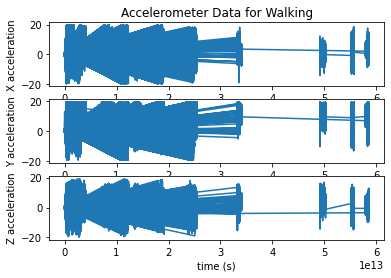

<Figure size 720x720 with 0 Axes>

In [10]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

In [11]:
X_acc= df['x'].values
Y_acc= df['y'].values
Z_acc= df['z'].values

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [12]:
def Filter (Data):
        a=0.6  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [13]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

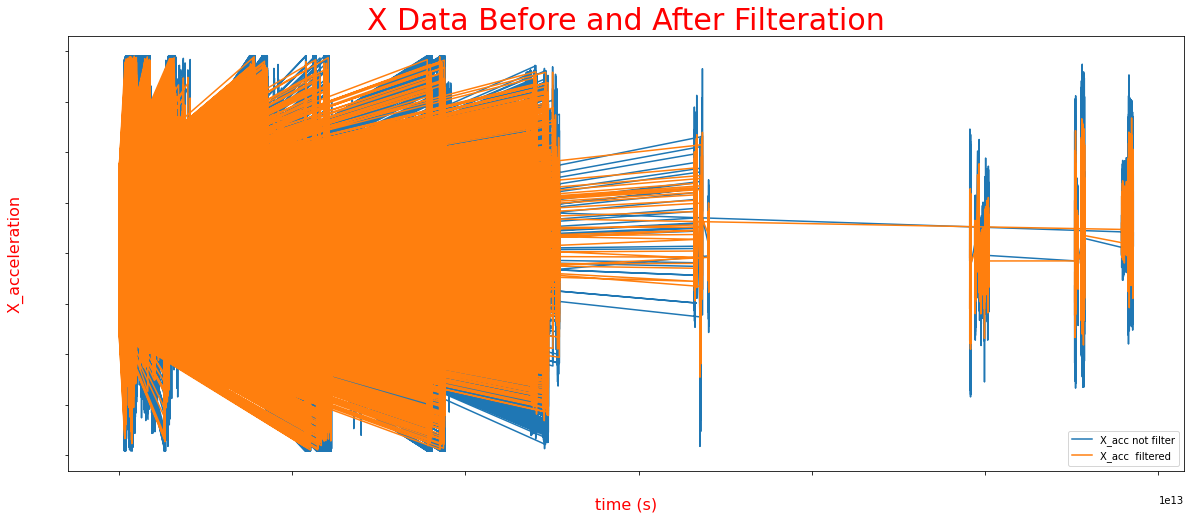

In [14]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('X_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


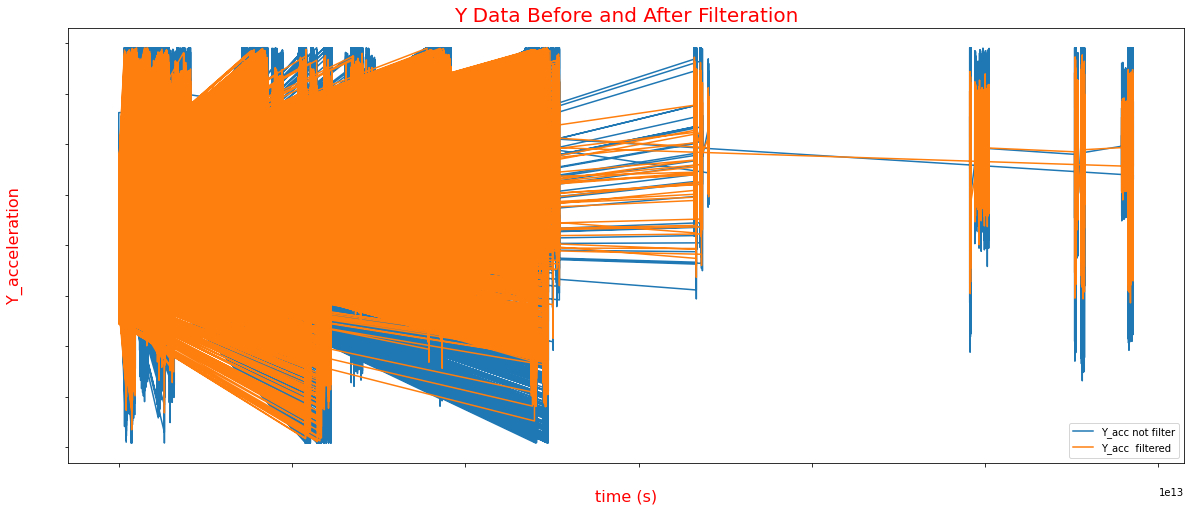

In [16]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='red',fontsize=20)
plt.ylabel('Y_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

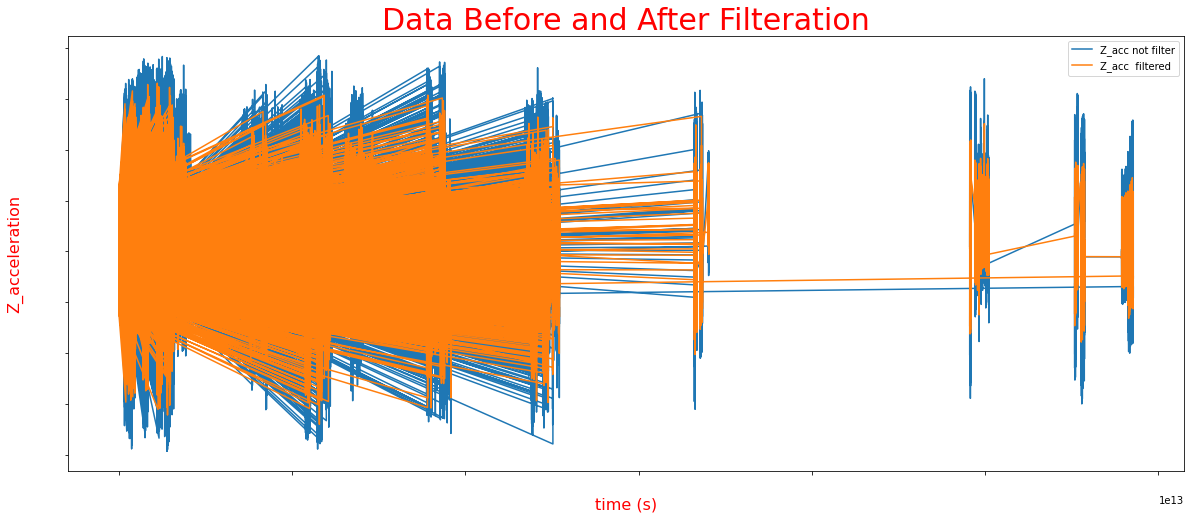

In [17]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('Z_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [18]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 4)
Y_smoothed = gaussian_filter1d(Y_filtered, 4)
Z_smoothed = gaussian_filter1d(Z_filtered, 4)


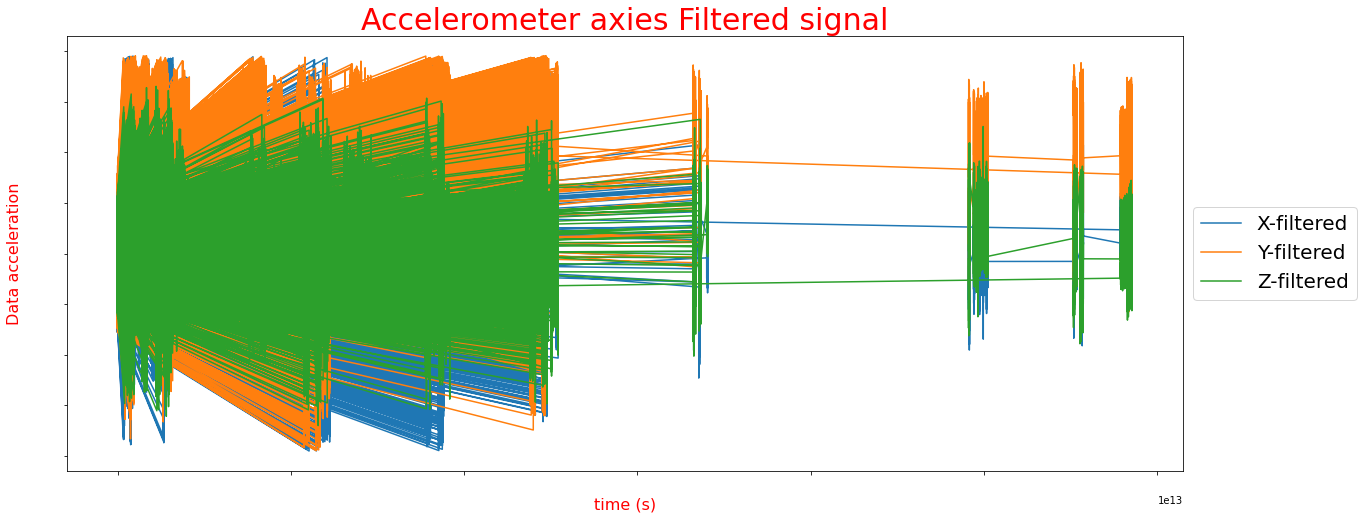

In [19]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

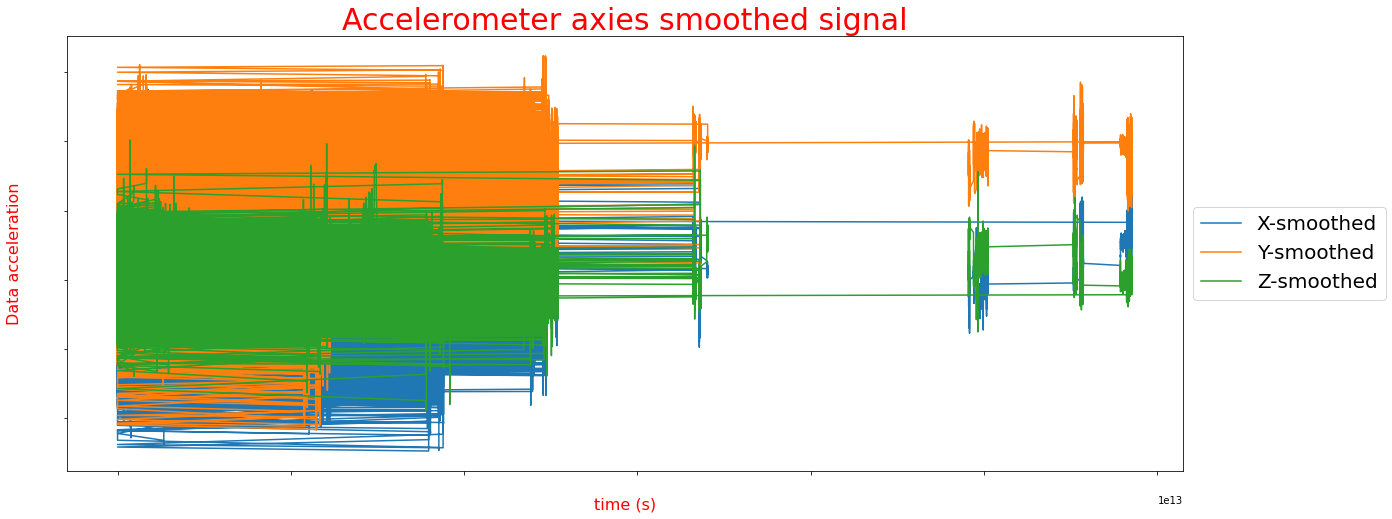

In [20]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

## Applying FD,XYZ & Searching for Strides

In [21]:
df_XYZ=df['x']*df['x']+df['y']*df['y']+df['z']*df['z']
XYZ=df_XYZ.apply(np.sqrt)

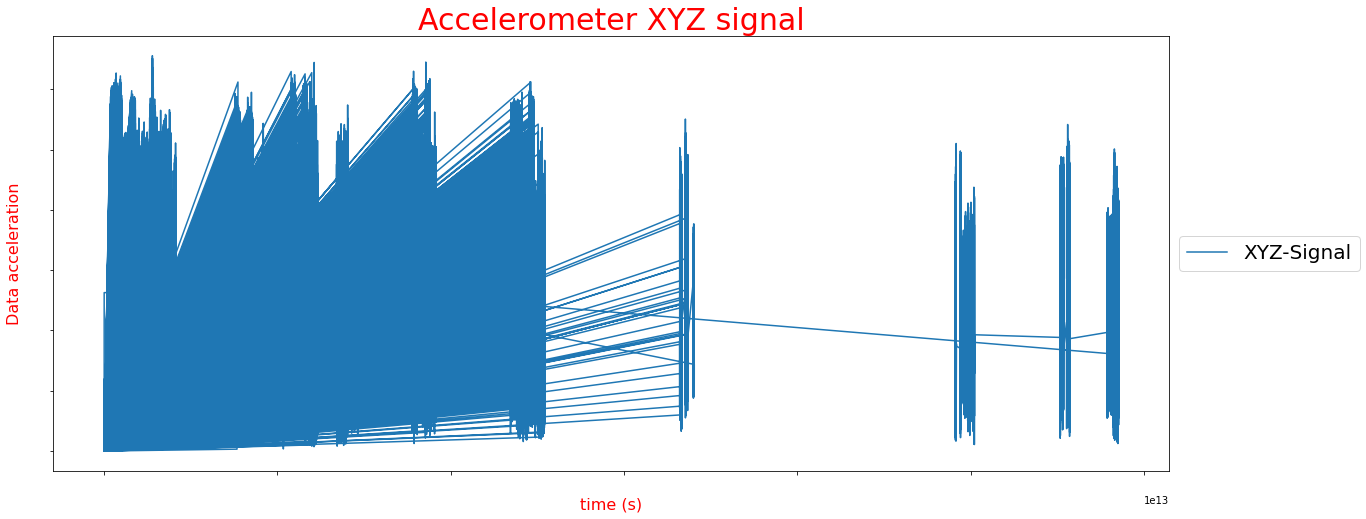

In [22]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ-Signal')

plt.title('Accelerometer XYZ signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

In [23]:

XYZ_smoothed=X_smoothed**2+Y_smoothed**2+Z_smoothed**2

In [24]:
xyz_smoothed=pd.DataFrame(XYZ_smoothed)

In [25]:
xyz_smoothed=xyz_smoothed.apply(np.sqrt)

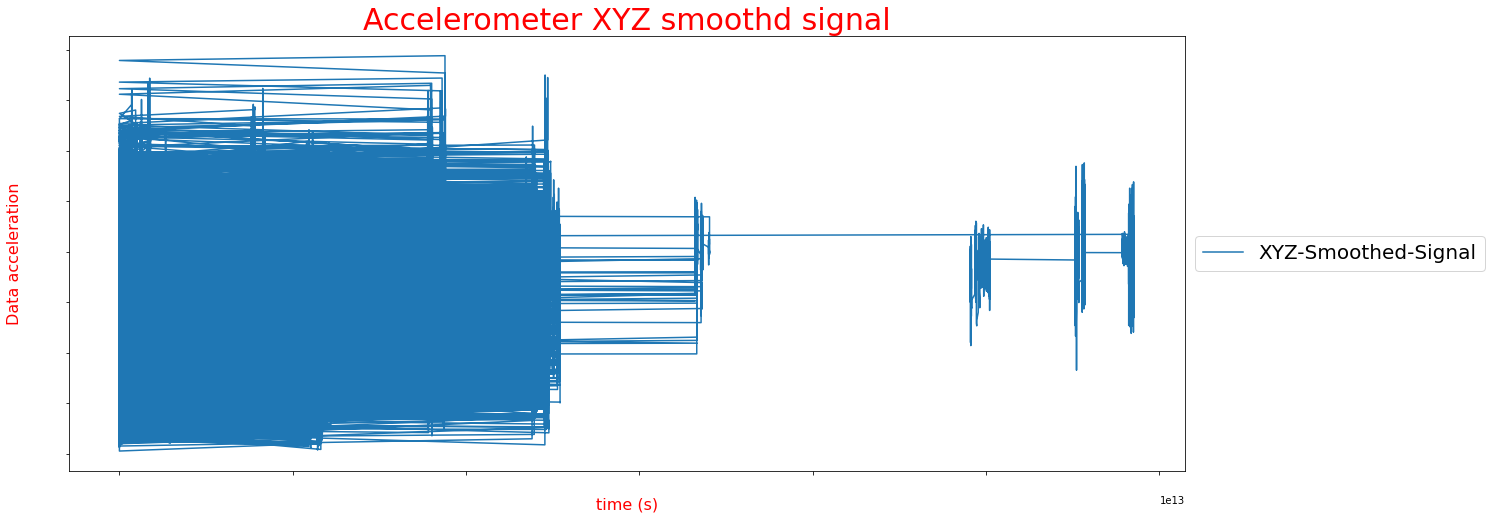

In [26]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],xyz_smoothed,label='XYZ-Smoothed-Signal')

plt.title('Accelerometer XYZ smoothd signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

## SET Peak And Valley for signal data & Perfom Segmentation 

In [27]:
peak=xyz_smoothed.values.flatten()

In [28]:
peak.shape

(343416,)

In [29]:
inv_peak=peak*-1 

Get Inverse of peak to find Valley 


In [30]:
from scipy.signal import find_peaks,peak_widths,find_peaks_cwt
peak_x, _ = find_peaks(peak)  ##Detect Peaks
valley, _ = find_peaks(inv_peak) ##detect valley

In [31]:
peak_x

array([    29,     44,     65, ..., 343387, 343396, 343409], dtype=int64)

In [32]:
list_of_valley=list(valley)

In [33]:
len(list_of_valley)

18926

In [34]:
t=df['timeElapsed']

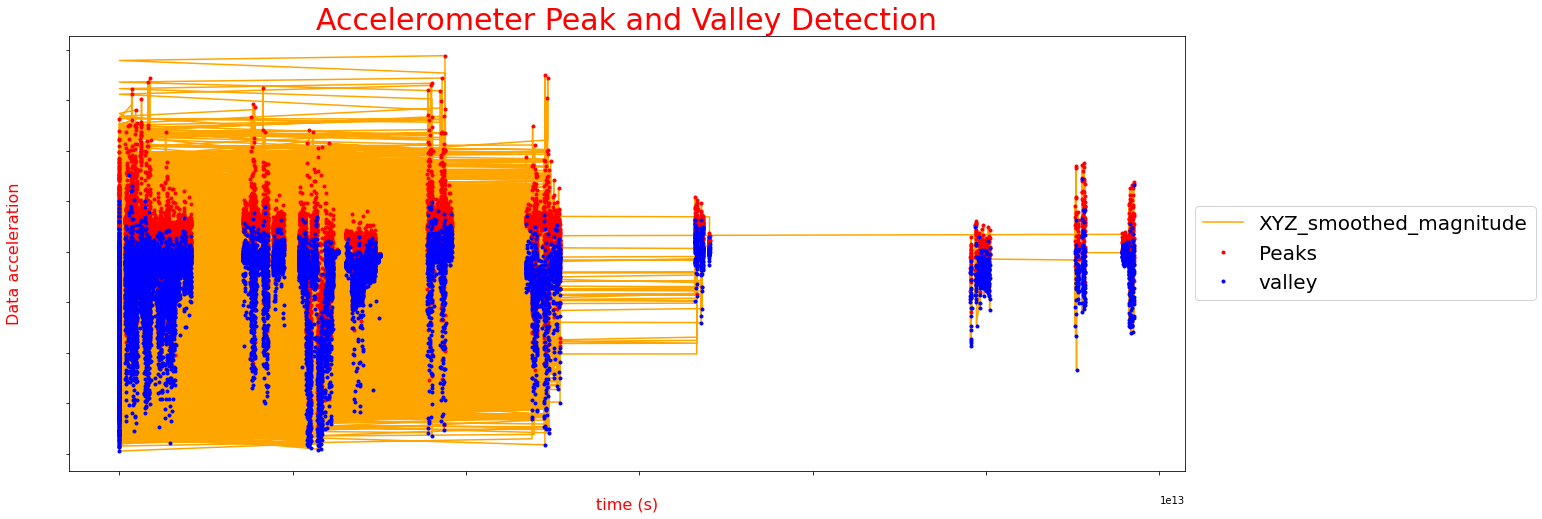

In [35]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],xyz_smoothed,label='XYZ_smoothed_magnitude',color='orange')
plt.plot(t[peak_x], peak[peak_x], 'r.',label='Peaks')
plt.plot(t[valley], peak[valley], 'b.',label='valley')

plt.title('Accelerometer Peak and Valley Detection',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

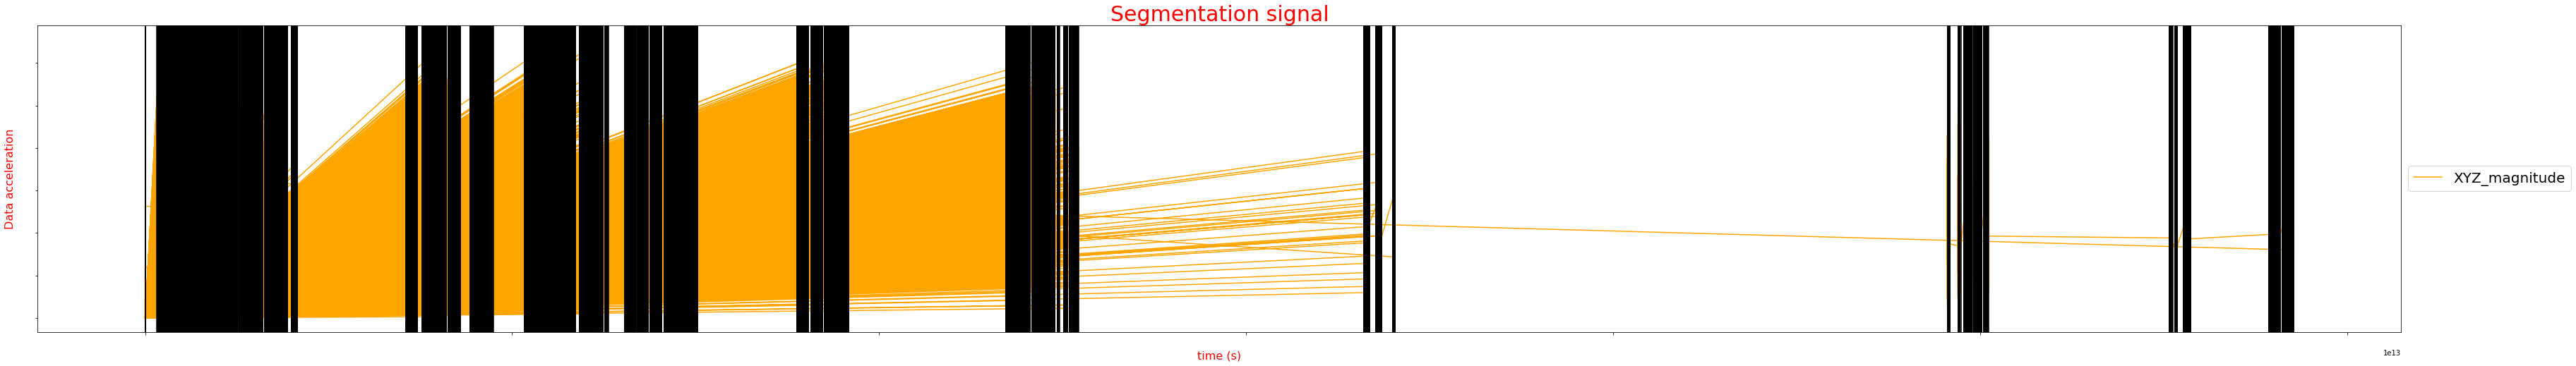

In [36]:
plt.figure(figsize=(60,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ_magnitude',color='orange')
for i in list_of_valley:
    plt.axvline(t[i],color='black')
plt.title('Segmentation signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

Calculate The Hight of each wave

In [37]:
hight_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        hight_xyz.append(max(XYZ[0:list_of_valley[0]])-min(XYZ[0:list_of_valley[0]]))
    else:
        hight_xyz.append(max(XYZ[list_of_valley[i-1]:list_of_valley[i]])-min(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
hight_xyz

[19.045723507158506,
 18.07711783257389,
 20.642804865900054,
 19.278801785238855,
 13.333962928008962,
 18.344869250292874,
 20.69995276120317,
 16.868152719022397,
 19.11427942004054,
 20.136605925989002,
 15.682047689096414,
 16.408119896445502,
 19.09983733683299,
 20.740254223611522,
 21.17310501084375,
 18.589914379402906,
 19.896629219877223,
 20.540052615191055,
 17.951790637924194,
 20.70839593968831,
 21.738408434513083,
 24.105776140889507,
 21.549774220909413,
 21.67665205730029,
 20.573196708848627,
 20.721233338311603,
 22.63418066911894,
 22.620450341575662,
 10.36748170259738,
 19.698997624183413,
 21.62670739489516,
 15.764454334192052,
 21.236860164099006,
 22.552806076199236,
 18.255966254146767,
 19.492759089674387,
 21.871812713143242,
 22.66008895099935,
 15.608935297300416,
 19.04519518315417,
 21.894969050379057,
 19.395974794274817,
 17.32815298021783,
 20.065582159546782,
 15.817927546559776,
 16.665428673565415,
 22.159373176838088,
 19.38593334082349,
 14.38

Calculate the Mean of every wave

In [38]:
import statistics
mean_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        mean_xyz.append(statistics.mean(XYZ[0:list_of_valley[0]]))
    else:
        mean_xyz.append(statistics.mean(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
mean_xyz

[12.210935980222805,
 11.425430358151853,
 11.353597347003339,
 11.809985884114925,
 12.577441803731496,
 11.439856124435877,
 11.731502309020229,
 13.031613341261737,
 11.916032733075276,
 12.460738257714373,
 13.548096799592955,
 12.895665969825698,
 13.392131444608662,
 12.074863163418591,
 11.4595409444943,
 11.085226458531277,
 12.307643102330646,
 10.984994881848737,
 12.47607728846657,
 12.177473007770033,
 10.766925979985478,
 12.528462931176112,
 12.419170255016443,
 12.333276683804256,
 12.919724261624003,
 12.614868875850512,
 12.373273964207593,
 10.98475851889705,
 10.029560402389041,
 11.435729194602898,
 10.806932532932201,
 10.098303904597532,
 11.151291125573868,
 11.12096003403484,
 10.69977533457993,
 10.247808185379034,
 10.183570217220035,
 10.072421361226622,
 11.830124006728155,
 11.490109376791048,
 10.486962702258987,
 10.306344623016283,
 11.18364362531423,
 11.149893713675963,
 11.173862086195737,
 10.19110262781553,
 10.833485797887091,
 10.750656762077746,


Calculating the width of each wave

In [39]:
width_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        width_xyz.append(t[list_of_valley[i]]-t[0])
    else:
        width_xyz.append(t[list_of_valley[i]]-t[list_of_valley[i-1]])
width_xyz

[1890014000,
 1820008000,
 2049987000,
 2119904000,
 900116000,
 2609924000,
 4220032000,
 1471100000,
 1958862000,
 1330017000,
 959961000,
 1010010000,
 1936188000,
 4033752000,
 4400299000,
 1819794000,
 2089996000,
 1510010000,
 3060028000,
 3059906000,
 1369965000,
 4920776000,
 2799286000,
 1600067000,
 1779938000,
 2910034000,
 1870178000,
 16327057000,
 212592774000,
 1709991000,
 3190003000,
 1600158000,
 2959839000,
 1729981000,
 2660064000,
 2159973000,
 4289978000,
 4629944000,
 2510071000,
 2299988000,
 2680023000,
 2779999000,
 1889984000,
 1619995000,
 2160004000,
 1759979000,
 2860016000,
 4600006000,
 1899994000,
 1989990000,
 24574433000,
 87395935000,
 1519592000,
 1200043000,
 1120025000,
 970002000,
 969970000,
 1389954000,
 1010040000,
 1399994000,
 2370026000,
 1129974000,
 1090027000,
 1119995000,
 1450012000,
 970032000,
 1289947000,
 3410004000,
 1630005000,
 2339996000,
 1170014000,
 3089996000,
 2049988000,
 1019989000,
 1169983000,
 1950073000,
 1189972000,

Calculating The standered deviassion of each wave

In [40]:
import statistics
std_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        std_xyz.append(statistics.stdev(XYZ[0:list_of_valley[0]]))
    else:
        std_xyz.append(statistics.stdev(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
std_xyz

[5.481845804990835,
 6.237248666415029,
 7.357964566494395,
 6.574164170322538,
 4.253014724292766,
 6.077103958762671,
 7.056613402440155,
 5.5891624430396565,
 7.152732202837109,
 6.353701065288795,
 5.546630506986754,
 5.826109832465474,
 6.013799195049666,
 6.702374217250832,
 6.832875973660564,
 6.262046617761064,
 6.634839267441474,
 7.305085652617396,
 5.750683748066551,
 7.055666533543268,
 7.566865547502131,
 7.414129641672105,
 6.307404050642904,
 6.98427233891209,
 6.264960530646781,
 6.143942423467903,
 7.807442725914012,
 8.11813053220431,
 2.466946323040664,
 5.065047435012806,
 5.505626233304773,
 4.601574271313044,
 5.567562394281034,
 5.936398599128432,
 5.128855434559648,
 5.583794831015083,
 5.248655403521672,
 4.780268705128275,
 4.200282060408153,
 5.505758649323898,
 5.109764166057912,
 5.3883313975646985,
 4.873374575150364,
 5.255132006143001,
 4.45675210221741,
 5.22436146477321,
 5.297322143731282,
 4.980939011015242,
 4.310481605478791,
 5.226611237323866,
 4

In [41]:
list_of_valley

[18,
 35,
 55,
 73,
 82,
 109,
 147,
 161,
 180,
 194,
 203,
 213,
 231,
 268,
 309,
 326,
 347,
 361,
 389,
 419,
 431,
 475,
 503,
 516,
 534,
 562,
 577,
 593,
 610,
 626,
 656,
 671,
 699,
 716,
 741,
 761,
 802,
 847,
 871,
 893,
 918,
 944,
 962,
 977,
 997,
 1014,
 1041,
 1084,
 1102,
 1121,
 1158,
 1180,
 1198,
 1212,
 1223,
 1232,
 1241,
 1254,
 1264,
 1277,
 1299,
 1310,
 1320,
 1331,
 1345,
 1354,
 1366,
 1399,
 1414,
 1436,
 1447,
 1476,
 1495,
 1505,
 1516,
 1534,
 1545,
 1565,
 1574,
 1584,
 1605,
 1615,
 1636,
 1645,
 1677,
 1685,
 1698,
 1728,
 1751,
 1771,
 1788,
 1807,
 1824,
 1839,
 1847,
 1868,
 1894,
 1906,
 1915,
 1932,
 1944,
 1978,
 1997,
 2005,
 2023,
 2049,
 2060,
 2089,
 2106,
 2117,
 2135,
 2165,
 2192,
 2216,
 2234,
 2249,
 2262,
 2291,
 2314,
 2325,
 2336,
 2369,
 2383,
 2403,
 2415,
 2434,
 2457,
 2469,
 2477,
 2489,
 2498,
 2509,
 2541,
 2559,
 2573,
 2580,
 2602,
 2630,
 2639,
 2652,
 2659,
 2672,
 2682,
 2711,
 2732,
 2743,
 2750,
 2759,
 2770,
 2791,


In [42]:
df_feature=pd.DataFrame({'Acc_Mean':mean_xyz,
                        'Acc_STD':std_xyz
                        ,'peak_height':hight_xyz
                        ,'peak_width':width_xyz})

In [43]:
df_feature.shape

(18926, 4)

In [44]:
list_of_label=[]

In [46]:
counter=0
for i in  list_of_valley:
    x=df['activity'].loc[i]
    list_of_label.append(x)  

    

In [47]:
for i in range(0,len(list_of_valley)):
    print(str(i)+'------>'+str(list_of_valley[i])+'------>'+str(list_of_label[i]))

0------>18------>Jogging
1------>35------>Jogging
2------>55------>Jogging
3------>73------>Jogging
4------>82------>Jogging
5------>109------>Jogging
6------>147------>Jogging
7------>161------>Jogging
8------>180------>Jogging
9------>194------>Jogging
10------>203------>Jogging
11------>213------>Jogging
12------>231------>Jogging
13------>268------>Jogging
14------>309------>Jogging
15------>326------>Jogging
16------>347------>Jogging
17------>361------>Jogging
18------>389------>Jogging
19------>419------>Jogging
20------>431------>Jogging
21------>475------>Jogging
22------>503------>Jogging
23------>516------>Jogging
24------>534------>Jogging
25------>562------>Jogging
26------>577------>Jogging
27------>593------>Jogging
28------>610------>Walking
29------>626------>Walking
30------>656------>Walking
31------>671------>Walking
32------>699------>Walking
33------>716------>Walking
34------>741------>Walking
35------>761------>Walking
36------>802------>Walking
37------>847----

3051------>57591------>Walking
3052------>57612------>Walking
3053------>57631------>Walking
3054------>57651------>Walking
3055------>57671------>Walking
3056------>57691------>Walking
3057------>57710------>Walking
3058------>57730------>Walking
3059------>57749------>Walking
3060------>57768------>Walking
3061------>57789------>Walking
3062------>57811------>Walking
3063------>57829------>Walking
3064------>57849------>Walking
3065------>57869------>Walking
3066------>57888------>Walking
3067------>57907------>Walking
3068------>57927------>Walking
3069------>57947------>Walking
3070------>57966------>Walking
3071------>57986------>Walking
3072------>58006------>Walking
3073------>58026------>Walking
3074------>58045------>Walking
3075------>58065------>Walking
3076------>58085------>Walking
3077------>58105------>Walking
3078------>58129------>Walking
3079------>58145------>Walking
3080------>58165------>Walking
3081------>58185------>Walking
3082------>58205------>Walking
3083----

6051------>113476------>Walking
6052------>113497------>Walking
6053------>113517------>Walking
6054------>113539------>Walking
6055------>113559------>Walking
6056------>113580------>Walking
6057------>113602------>Walking
6058------>113623------>Walking
6059------>113644------>Walking
6060------>113666------>Walking
6061------>113686------>Walking
6062------>113707------>Walking
6063------>113728------>Walking
6064------>113749------>Walking
6065------>113770------>Walking
6066------>113791------>Walking
6067------>113811------>Walking
6068------>113832------>Walking
6069------>113853------>Walking
6070------>113875------>Walking
6071------>113896------>Walking
6072------>113916------>Walking
6073------>113937------>Walking
6074------>113959------>Walking
6075------>113980------>Walking
6076------>114001------>Walking
6077------>114023------>Walking
6078------>114045------>Walking
6079------>114066------>Walking
6080------>114088------>Walking
6081------>114109------>Walking
6082----

9022------>169135------>Jogging
9023------>169148------>Jogging
9024------>169163------>Jogging
9025------>169180------>Jogging
9026------>169186------>Jogging
9027------>169193------>Jogging
9028------>169198------>Jogging
9029------>169207------>Jogging
9030------>169225------>Jogging
9031------>169244------>Jogging
9032------>169260------>Jogging
9033------>169267------>Jogging
9034------>169283------>Jogging
9035------>169300------>Jogging
9036------>169312------>Jogging
9037------>169326------>Jogging
9038------>169347------>Jogging
9039------>169357------>Jogging
9040------>169382------>Jogging
9041------>169397------>Jogging
9042------>169411------>Jogging
9043------>169426------>Jogging
9044------>169445------>Jogging
9045------>169456------>Jogging
9046------>169465------>Jogging
9047------>169487------>Jogging
9048------>169498------>Jogging
9049------>169516------>Jogging
9050------>169526------>Jogging
9051------>169548------>Jogging
9052------>169563------>Jogging
9053----

11867------>220979------>Downstairs
11868------>220995------>Downstairs
11869------>221012------>Downstairs
11870------>221031------>Downstairs
11871------>221041------>Downstairs
11872------>221055------>Downstairs
11873------>221080------>Downstairs
11874------>221097------>Downstairs
11875------>221107------>Downstairs
11876------>221136------>Downstairs
11877------>221151------>Downstairs
11878------>221162------>Downstairs
11879------>221172------>Downstairs
11880------>221200------>Downstairs
11881------>221236------>Downstairs
11882------>221250------>Downstairs
11883------>221262------>Downstairs
11884------>221277------>Downstairs
11885------>221292------>Downstairs
11886------>221305------>Downstairs
11887------>221323------>Downstairs
11888------>221347------>Sitting
11889------>221361------>Sitting
11890------>221375------>Sitting
11891------>221392------>Sitting
11892------>221408------>Sitting
11893------>221439------>Sitting
11894------>221461------>Sitting
11895------>2

15078------>279316------>Walking
15079------>279337------>Walking
15080------>279356------>Walking
15081------>279365------>Walking
15082------>279376------>Walking
15083------>279398------>Walking
15084------>279419------>Walking
15085------>279440------>Walking
15086------>279461------>Walking
15087------>279491------>Walking
15088------>279505------>Walking
15089------>279526------>Walking
15090------>279548------>Walking
15091------>279570------>Walking
15092------>279579------>Walking
15093------>279594------>Walking
15094------>279615------>Walking
15095------>279622------>Walking
15096------>279636------>Walking
15097------>279658------>Walking
15098------>279666------>Walking
15099------>279680------>Walking
15100------>279690------>Walking
15101------>279701------>Walking
15102------>279723------>Walking
15103------>279731------>Walking
15104------>279744------>Walking
15105------>279767------>Walking
15106------>279790------>Walking
15107------>279812------>Walking
15108-----

17929------>329656------>Walking
17930------>329671------>Walking
17931------>329678------>Walking
17932------>329690------>Walking
17933------>329702------>Walking
17934------>329713------>Walking
17935------>329721------>Walking
17936------>329734------>Walking
17937------>329742------>Walking
17938------>329754------>Walking
17939------>329763------>Walking
17940------>329776------>Walking
17941------>329784------>Walking
17942------>329796------>Walking
17943------>329804------>Walking
17944------>329816------>Walking
17945------>329826------>Walking
17946------>329839------>Walking
17947------>329847------>Walking
17948------>329859------>Walking
17949------>329868------>Walking
17950------>329880------>Walking
17951------>329890------>Walking
17952------>329901------>Walking
17953------>329911------>Walking
17954------>329924------>Walking
17955------>329932------>Walking
17956------>329946------>Walking
17957------>329954------>Walking
17958------>329967------>Walking
17959-----

In [48]:
df['label'].iloc[10577]

KeyError: 'label'

In [ ]:
i=10577
df.drop(10577,inplace=True)

In [49]:
df_feature['label']=list_of_label

In [50]:
df_feature.shape

(18926, 5)

In [51]:
df_feature.head()

,Acc_Mean,Acc_STD,peak_height,peak_width,label
0,12.210936,5.481846,19.045724,1890014000,Jogging
1,11.425430,6.237249,18.077118,1820008000,Jogging
2,11.353597,7.357965,20.642805,2049987000,Jogging
3,11.809986,6.574164,19.278802,2119904000,Jogging
4,12.577442,4.253015,13.333963,900116000,Jogging


In [52]:
X=df_feature.drop(columns=['label']).values
y=df_feature['label']

In [53]:
X.shape

(18926, 4)

In [54]:
y.shape

(18926,)

# Classification Phase

### Splitting data to train and test

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=49)

In [56]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (15140, 4)
X_test_shape ----> (3786, 4)
Y_train_shape ----> (15140,)
Y_test_shape ----> (3786,)


### Preprocessimg label data and feature

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_labeled=le.fit_transform(y_train)
y_labeled_test=le.transform(y_test)
y_labeled.shape


(15140,)

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_Scaler_train=sc.fit_transform(X_train)
x_Scaler_test=sc.transform(X_test)
x_Scaler_train.shape


(15140, 4)

### Using Support vector machine Classification

Cross validation for train data is :  [0.77016049 0.78165247 0.77110583]
Cross validation for test data is :  [0.75356577 0.7503962  0.75911252]
Confusion matrix is :  [[ 114   36    0    1   44  233]
 [   7 1368    0    0    1   86]
 [   0    0   17   21    0    0]
 [   0    0   16   31    0    0]
 [  41   36    0    1   78  212]
 [  55   73    0    2    4 1309]]


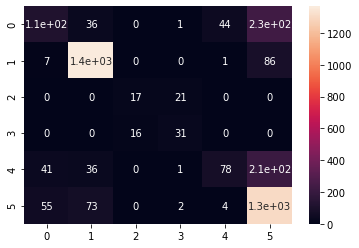

In [59]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf', random_state = 0)
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_svm_train)
cv_svm_test = cross_val_score(classifier_SVC , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_svm_test)
y_pred = classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)


In [60]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)


### Using KNN Classification

Cross validation for train data is :  [0.75193184 0.75292253 0.76337693]
Cross validation for test data is :  [0.74247227 0.74247227 0.74405705]
Confusion matrix is :  [[ 181   29    0    0   61  157]
 [  34 1339    0    0   16   73]
 [   0    0   38    0    0    0]
 [   0    0    0   46    1    0]
 [ 104   30    0    1  121  112]
 [ 187   82    0    0   41 1133]]


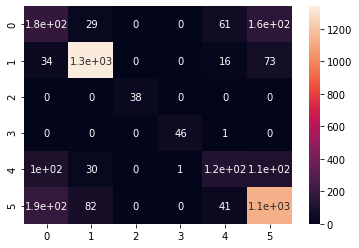

In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 3)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_knn_train)
cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_knn_test)
y_pred = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [62]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)

### Using Random forest Classifier

Cross validation for train data is :  [0.82246879 0.83118684 0.82897344]
Cross validation for test data is :  [0.81378764 0.81537242 0.81220285]
Confusion matrix is :  [[ 238   24    0    0   49  117]
 [  21 1395    0    0   10   36]
 [   0    0   38    0    0    0]
 [   0    0    1   45    1    0]
 [  60   38    0    0  197   73]
 [  96   39    0    1   38 1269]]


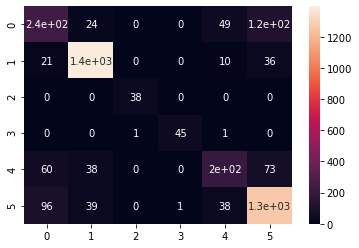

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 17, criterion = 'entropy', random_state = 0)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_rf_train)
cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_rf_test)
y_pred = classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [64]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)

### Using Decision Tree Classifier

Cross validation for train data is :  [0.77907668 0.78937983 0.78081649]
Cross validation for test data is :  [0.78050713 0.79239303 0.76862124]
Confusion matrix is :  [[ 252   32    0    0   58   86]
 [  39 1347    1    0    3   72]
 [   0    0   37    1    0    0]
 [   0    0   14   32    1    0]
 [  72   36    0    0  158  102]
 [ 204   52    0    0   32 1155]]


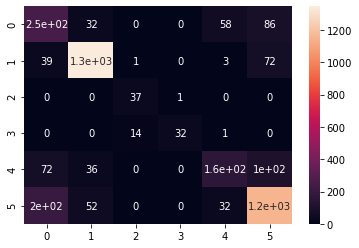

In [65]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = 5)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_dt_train)
cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_dt_test)
y_pred = classifier_DT.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [66]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

### Using Navie Bayes Classifier

Cross validation for train data is :  [0.70378443 0.7136913  0.71145462]
Cross validation for test data is :  [0.7155309  0.71236133 0.72028526]
Confusion matrix is :  [[  80   16    8    0   46  278]
 [   4 1200    0    0    9  249]
 [   0    0   17   21    0    0]
 [   0    0    2   45    0    0]
 [  53   36    9    0   67  203]
 [  78   50    2    0   10 1303]]


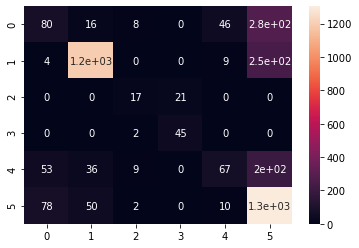

In [67]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_nv_train)
cv_nv_test = cross_val_score(classifier_NB , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_nv_test)
y_pred = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [68]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)

### Showing Accuracy using accuracy_score

In [69]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',accuracy_score(y_labeled_test, y_pred_SVC))
print('Accuracy of Desicion Tree--------->',accuracy_score(y_labeled_test, y_pred_DT))
print('Accuracy of Random forest--------->',accuracy_score(y_labeled_test, y_pred_RF))
print('Accuracy of KNN          --------->',accuracy_score(y_labeled_test, y_pred_Knn))
print('Accuracy of Navie Bayes  --------->',accuracy_score(y_labeled_test, y_pred_NB))  

Accuracy of SVC          ---------> 0.7704701531959852
Accuracy of Desicion Tree---------> 0.7873745377707343
Accuracy of Random forest---------> 0.8404648705758055
Accuracy of KNN          ---------> 0.7548864236661385
Accuracy of Navie Bayes  ---------> 0.716323296354992


In [70]:
y_prediction_test_SVC=classifier_SVC.predict(x_Scaler_train)
y_prediction_test_KNN=classifier_KNN.predict(x_Scaler_train)
y_prediction_test_RF=classifier_RF.predict(x_Scaler_train)
y_prediction_test_DT=classifier_DT.predict(x_Scaler_train)
y_prediction_test_NB=classifier_NB.predict(x_Scaler_train)


In [71]:
print('Accuracy of SVC          --------->',accuracy_score(y_labeled, y_prediction_test_SVC))
print('Accuracy of Desicion Tree--------->',accuracy_score(y_labeled, y_prediction_test_KNN))
print('Accuracy of Random forest--------->',accuracy_score(y_labeled, y_prediction_test_RF))
print('Accuracy of KNN          --------->',accuracy_score(y_labeled, y_prediction_test_DT))
print('Accuracy of Navie Bayes  --------->',accuracy_score(y_labeled, y_prediction_test_NB))  

Accuracy of SVC          ---------> 0.7760237780713343
Accuracy of Desicion Tree---------> 0.8500660501981506
Accuracy of Random forest---------> 0.9967635402906209
Accuracy of KNN          ---------> 0.7947820343461031
Accuracy of Navie Bayes  ---------> 0.7122192866578599


In [72]:
y_prediction_test_DT.shape

(15140,)